**Proyecto**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomTreesEmbedding
#from sklearn.neural_network import BernoulliRBM


In [ ]:
# read data

df = pd.read_csv("books.csv",error_bad_lines=False)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
# Ver los idiomas de los libros

np.unique(df["language_code"])

array(['ale', 'ara', 'en-CA', 'en-GB', 'en-US', 'eng', 'enm', 'fre',
       'ger', 'gla', 'glg', 'grc', 'ita', 'jpn', 'lat', 'msa', 'mul',
       'nl', 'nor', 'por', 'rus', 'spa', 'srp', 'swe', 'tur', 'wel',
       'zho'], dtype=object)

In [ ]:
# Compactificar idiomas

df.loc[df["language_code"]=="en-CA","language_code"] = "eng"
df.loc[df["language_code"]=="en-GB","language_code"] = "eng"
df.loc[df["language_code"]=="en-US","language_code"] = "eng"
np.unique(df["language_code"])

array(['ale', 'ara', 'eng', 'enm', 'fre', 'ger', 'gla', 'glg', 'grc',
       'ita', 'jpn', 'lat', 'msa', 'mul', 'nl', 'nor', 'por', 'rus',
       'spa', 'srp', 'swe', 'tur', 'wel', 'zho'], dtype=object)

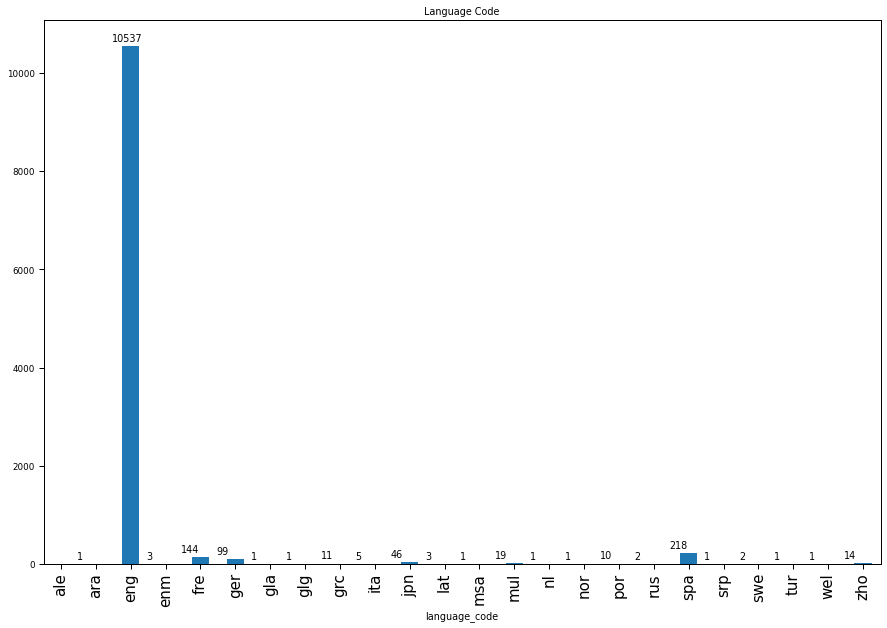

In [ ]:
# Grafico de cant de libros vs idioma

sns.set_context('paper')
plt.figure(figsize=(15,10))
ax = df.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))

In [ ]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [ ]:
# Eliminar espacios de los nombres de las columnas
df.columns = df.columns.str.strip()

In [ ]:
# Crear dataframe con libros con 0 paginas
# esta de mas
#df_null_pages = df.loc[df['num_pages']==0]

In [ ]:
# Crear dataframe con libros not a book

df_not_a_book = df.loc[df['authors']=="NOT A BOOK"]

In [ ]:
# Ver las editoriales de df_audios

a = np.unique(df_not_a_book["publisher"])
a.shape

(3,)

In [ ]:
a

array(['BBC Physical Audio', 'Simon  Schuster Audio',
       'Simon & Schuster Audio'], dtype=object)

In [ ]:
# Crear dataframe con libros con numero de paginas menor a 5
# consejo: visualizar cuantos tienen menos de 5 pag

df_libro_chiquito = df.loc[df['num_pages']<5]
np.unique(df_libro_chiquito["publisher"])

array(['Addison Wesley Publishing Company', 'Audio Literature',
       'Audio Partners', 'Audio Renaissance', 'AudioGO', 'AudioText',
       'Audiogo', 'BBC Audiobooks', 'BBC Audiobooks Ltd',
       'BBC Physical Audio', 'BBC Worldwide', 'Ballantine Books',
       'Basic Books', 'Blackstone Audiobooks', 'Brilliance Audio',
       'Caedmon', 'Canadian Broadcasting Corporation (CBC Audio)',
       'Fawcett', 'Fawcett Coventry', 'Gold Eagle',
       'Grand Central Publishing', 'Hachette Audio', 'HarperAudio',
       'HarperCollins Publishers', 'HarperFestival', 'Hay House',
       'Hodder Audio', 'Ivy Books', 'Knopf', 'Knowledge Products',
       'Listening Library (Audio)', 'MacMillan Audio', 'Macmillan Audio',
       'Mariner Books', 'Moody Publishers', 'Naxos Audiobooks',
       'Nova Audio Books', 'Planeta Publishing', 'Prentice Hall',
       'Puffin', 'Puffin Audiobooks', 'RH Audio', 'RH Audio Price-less',
       'Random House Audio', 'Random House Audio Publishing Group',
       'Ra

In [ ]:
# Crear dataframe con los que son libros segun nuestros parametros

df_libros = df.loc[df['num_pages']>=5]
df_libros = df_libros[~df_libros['publisher'].str.contains("Audio",case=False)]
#df = df.loc["audio" in df['publisher']]
df_libros = df_libros.reset_index()

<Figure size 1080x720 with 0 Axes>

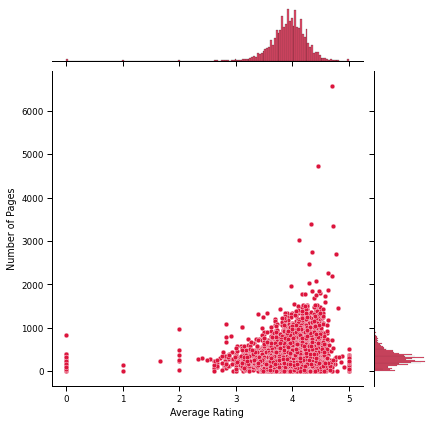

In [ ]:
# Grafico de numero de paginas vs nota promedio

plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="num_pages", data = df, color = 'crimson')
ax.set_axis_labels("Average Rating", "Number of Pages")

In [ ]:
# Se define una funcion para identificar el primer autor

def primer_autor(text):
    arr = text.split('/')
    return arr[0]
# Se crea una nueva columna con el primer autor
df['primer_autor'] = df['authors'].apply(lambda x : primer_autor(x))

total_rating = df.drop_duplicates(subset=['primer_autor', 'title'], keep='first')
total_rating = total_rating.groupby(by=['primer_autor']).agg({'average_rating': ['sum']})
total_rating.columns = ['total_rating']
total_rating.reset_index(inplace=True)
total_rating = total_rating.sort_values(by=['total_rating'], ascending=False)
total_rating

,primer_autor,total_rating
3753,Stephen King,250.79
3006,P.G. Wodehouse,187.31
4161,William Shakespeare,178.45
1603,J.R.R. Tolkien,172.22
3536,Rumiko Takahashi,163.28
...,...,...
146,Andrew Hunt,0.00
1654,James Craig Holte,0.00
1751,Jasmine C.M. Luk,0.00
935,Dobrica Erić,0.00


In [ ]:
total_book = df.groupby(by=['primer_autor']).agg({'title': ['nunique']})
total_book.columns = ['total_book']
total_book.reset_index(inplace=True)
total_book = total_book.sort_values(by=['total_book'], ascending=False)
total_book

,primer_autor,total_book
3753,Stephen King,63
4161,William Shakespeare,45
3006,P.G. Wodehouse,45
29,Agatha Christie,41
1603,J.R.R. Tolkien,41
...,...,...
1727,Jane Parker Resnick,1
1729,Jane Robins,1
1731,Jane Walmsley,1
1732,Jane Werner Watson,1


In [ ]:
avg_author = pd.merge(total_book, total_rating, on='primer_autor', how='outer')
avg_author['average_rating'] = round(avg_author['total_rating'] / avg_author['total_book'], 2)
avg_author = avg_author[avg_author['total_book'] >0]
avg_author['adjusted_rating'] = avg_author['average_rating']*(avg_author['total_book']+20*avg_author['total_book'].mean())/20*avg_author['total_book'].mean()
avg_author = avg_author.sort_values(by=['adjusted_rating'], ascending=False)
avg_author.head(10)

,primer_autor,total_book,total_rating,average_rating,adjusted_rating
0,Stephen King,63,250.79,3.98,55.324002
2,P.G. Wodehouse,45,187.31,4.16,48.569574
4,J.R.R. Tolkien,41,172.22,4.20,46.959806
1,William Shakespeare,45,178.45,3.97,46.351252
7,Rumiko Takahashi,39,163.28,4.19,45.812078
6,Mercedes Lackey,40,160.11,4.00,44.229153
3,Agatha Christie,41,161.82,3.95,44.164580
5,James Patterson,41,159.91,3.90,43.605535
22,Hiromu Arakawa,26,118.42,4.55,42.436193
9,Roald Dahl,35,141.66,4.05,42.278752


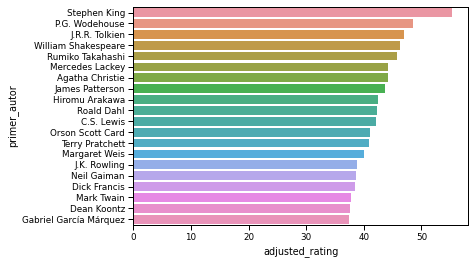

In [ ]:
sns.barplot(
    y = "primer_autor",
    x = "adjusted_rating",
    data = avg_author.head(20)
)

In [ ]:
fechas_buenas = []
for i in range(df.shape[0]):
  fecha = df["publication_date"][i].split("/")
  if len(fecha[0])==1:
    fecha[0] = "0"+fecha[0]
  if len(fecha[1])==1:
    fecha[1] = "0"+fecha[1]
  fechas_buenas.append(fecha[2])
df["año"] = fechas_buenas

In [ ]:
df.head()


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,primer_autor,año
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,J.K. Rowling,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,J.K. Rowling,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,J.K. Rowling,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,J.K. Rowling,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,J.K. Rowling,2004


In [ ]:
np.unique(df["año"])

array(['1900', '1913', '1914', '1919', '1921', '1922', '1923', '1925',
       '1928', '1929', '1931', '1935', '1940', '1943', '1947', '1948',
       '1949', '1950', '1952', '1953', '1954', '1955', '1956', '1957',
       '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

In [ ]:
grupo = df.groupby("año")
anios = grupo["authors"].count().reset_index()
anios

,año,authors
0,1900,1
1,1913,1
2,1914,1
3,1919,1
4,1921,2
...,...,...
82,2016,6
83,2017,7
84,2018,5
85,2019,6


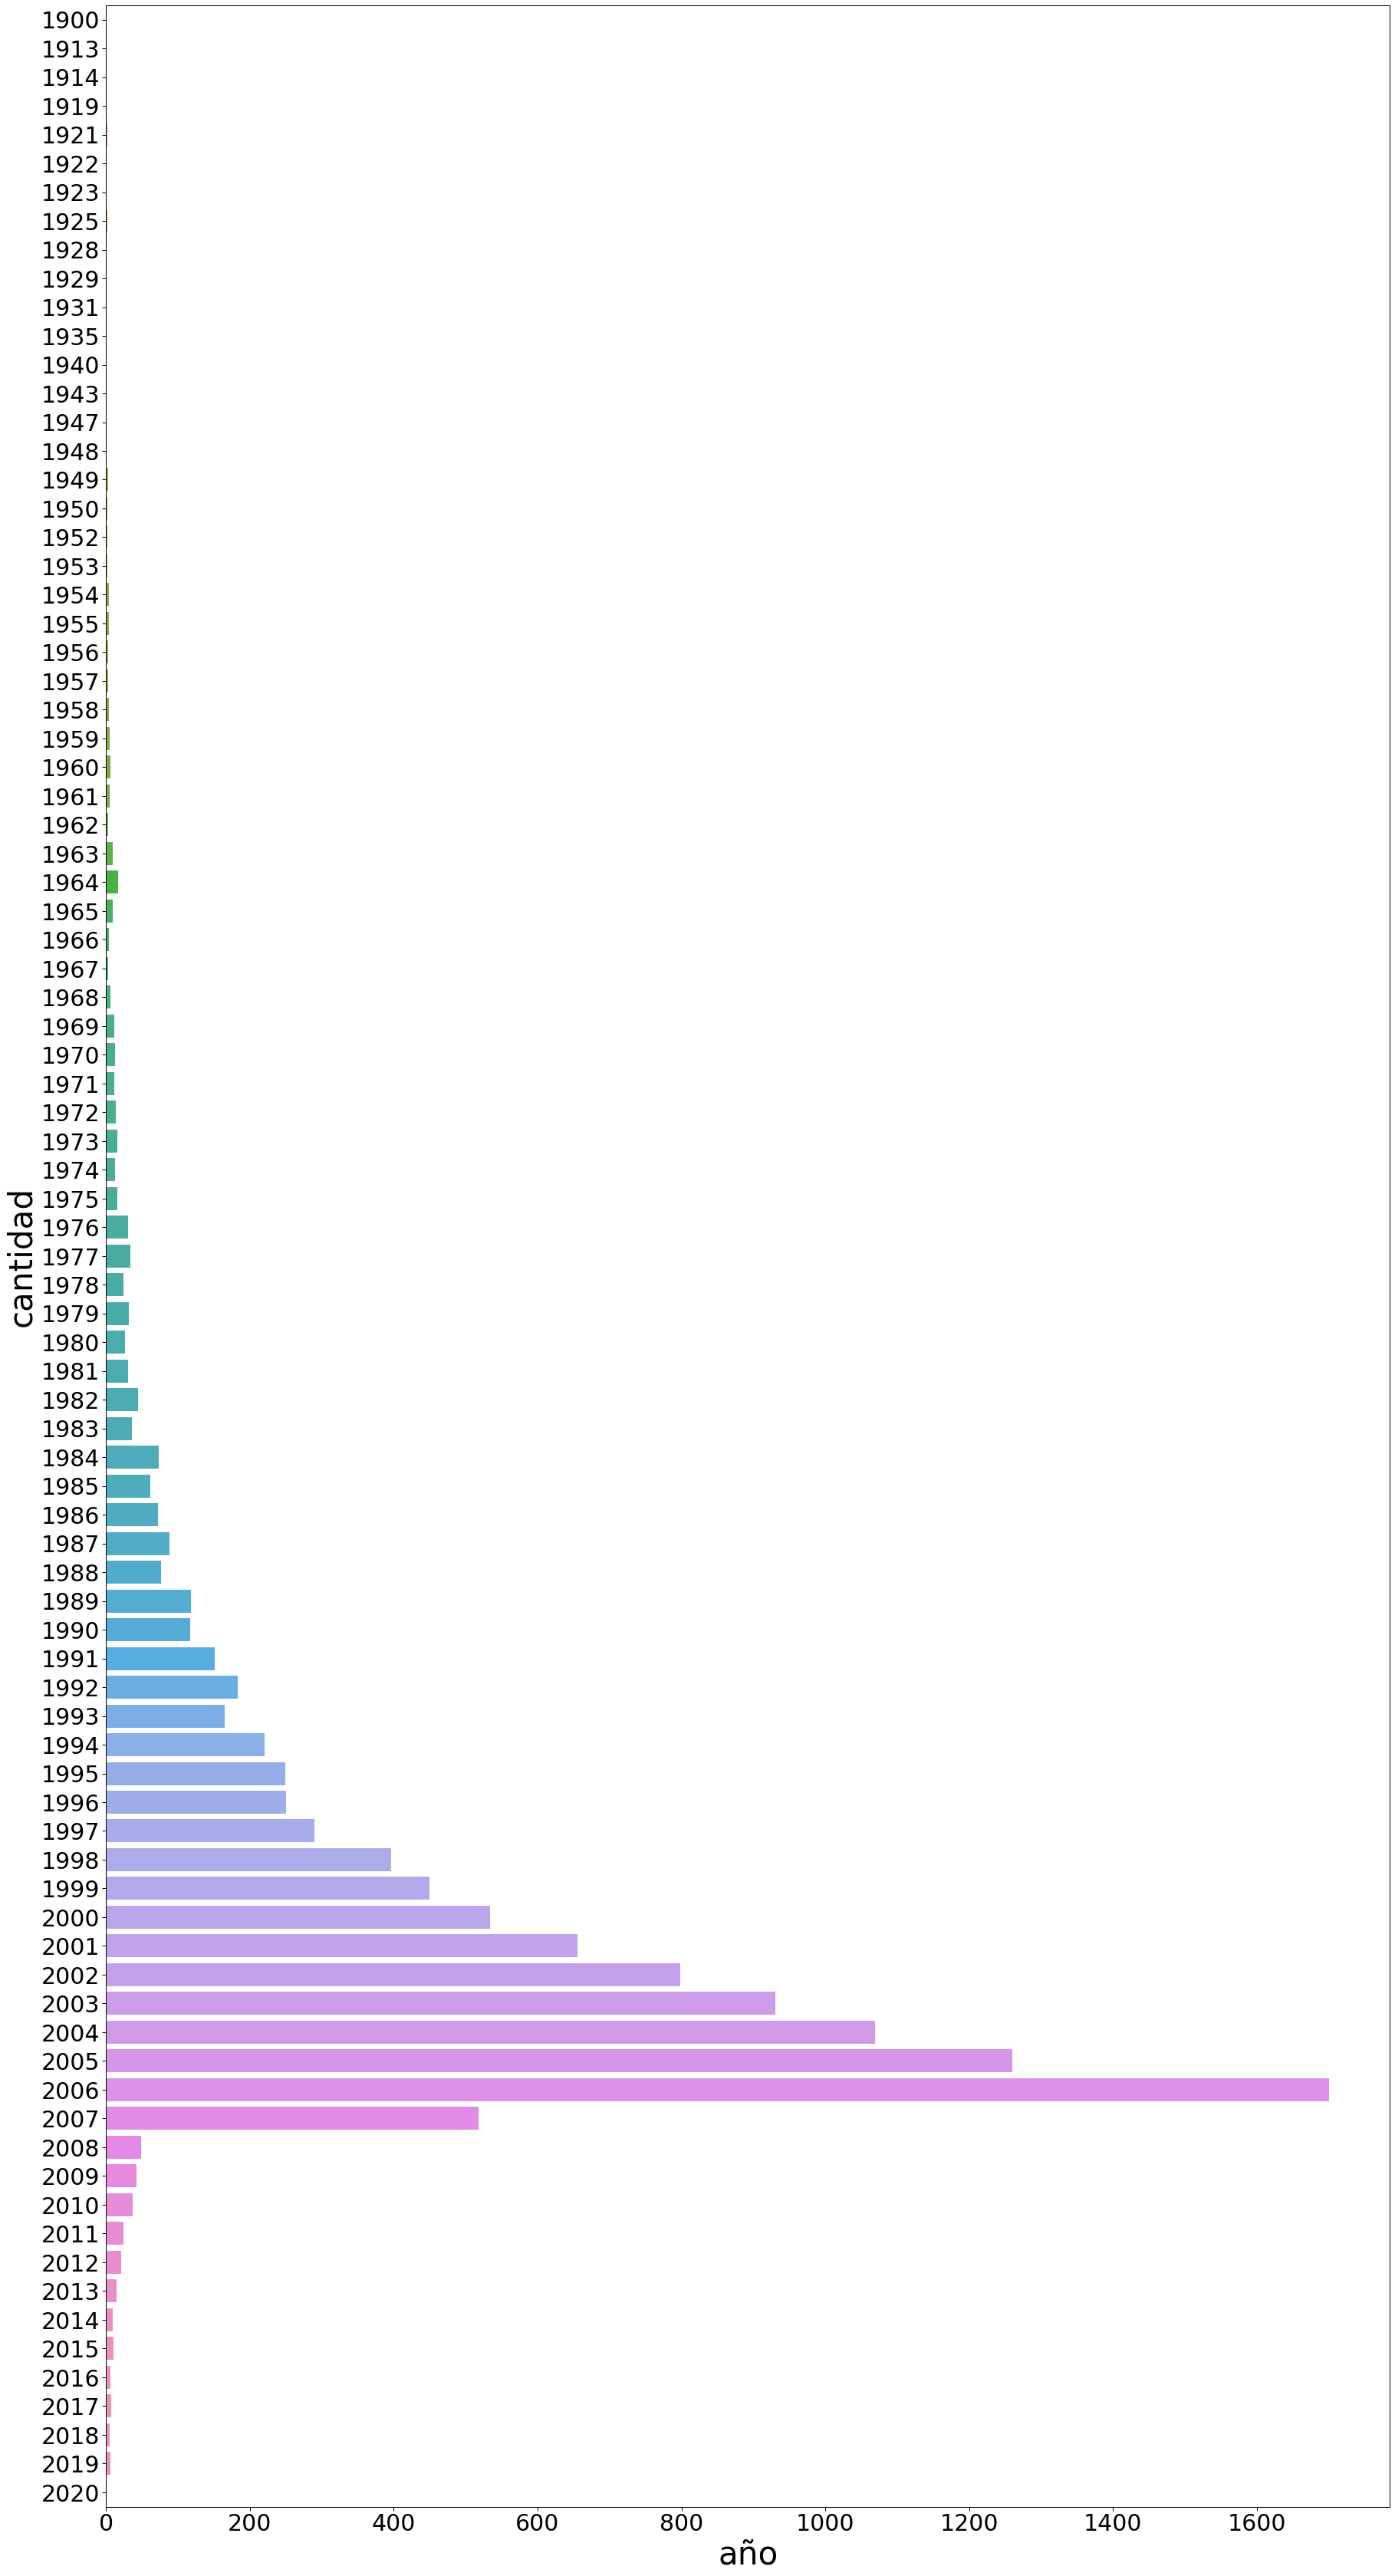

In [ ]:
fig = plt.figure( figsize= (30,60))
sns.barplot(
    y = "año",
    x = "authors",
    data = anios
)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("año",fontsize = 42)
plt.ylabel("cantidad",fontsize = 42)
plt.show()

HASTA AQUÍ TAMO BIEN

- Ahora, propongo usar el kmeans para crear un modelo de clasificación piola y despues vemos que hacemos con los otros modelos de clasificación y que tanto nos sirve cada uno ( 

In [ ]:
df_numerico = df[["average_rating","año","num_pages","text_reviews_count","ratings_count"]]
scaler = StandardScaler() #estandarizamos los datos
df_numerico = pd.DataFrame(scaler.fit_transform(df_numerico),columns = ["average_rating","año","num_pages","text_reviews_count","ratings_count"])
df_numerico.head()

,average_rating,año,num_pages,text_reviews_count,ratings_count
0,1.814493,0.707055,1.308751,10.498316,18.469833
1,1.586228,0.464538,2.212783,11.130957,18.980766
2,1.386496,0.343280,0.064669,-0.115679,-0.103204
3,1.785960,0.464538,0.408865,13.888182,20.637902
4,2.413689,0.464538,9.760210,-0.146729,0.208768


In [ ]:
df_cat = df[["language_code"]]
df_cat = pd.get_dummies(df_cat)
df_cat

,language_code_ale,language_code_ara,language_code_eng,language_code_enm,language_code_fre,language_code_ger,language_code_gla,language_code_glg,language_code_grc,language_code_ita,...,language_code_nl,language_code_nor,language_code_por,language_code_rus,language_code_spa,language_code_srp,language_code_swe,language_code_tur,language_code_wel,language_code_zho
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11119,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11120,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11121,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_procesado = pd.concat([df_numerico,df_cat],axis=1)
df_procesado

,average_rating,año,num_pages,text_reviews_count,ratings_count,language_code_ale,language_code_ara,language_code_eng,language_code_enm,language_code_fre,...,language_code_nl,language_code_nor,language_code_por,language_code_rus,language_code_spa,language_code_srp,language_code_swe,language_code_tur,language_code_wel,language_code_zho
0,1.814493,0.707055,1.308751,10.498316,18.469833,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.586228,0.464538,2.212783,11.130957,18.980766,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.386496,0.343280,0.064669,-0.115679,-0.103204,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.785960,0.464538,0.408865,13.888182,20.637902,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.413689,0.464538,9.760210,-0.146729,0.208768,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,0.359303,0.464538,0.728179,-0.202619,-0.158114,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11119,0.416369,-1.475595,1.238253,-0.188646,-0.152540,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11120,0.073971,-0.869303,0.325926,-0.173510,-0.152211,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11121,-0.610824,0.828313,0.404718,-0.156432,-0.152664,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
model = NearestNeighbors(n_neighbors = 6)
fit_model = model.fit(df_procesado)
distance, indices = fit_model.kneighbors(df_procesado)
indices

array([[    0,     1,  2114,  2116,  4415,     3],
       [    1,     0,  4415,  2114,     3,  2116],
       [    2,  9970,  6932,  3105,  3110,  8925],
       ...,
       [11120,  3141,  2347,  5073,  2753,  1852],
       [11121,  6781,  3796,  6010,  6895,  7533],
       [11122,   355,  3485,  4492, 11073,  1449]])

In [ ]:
indices.shape

(11123, 6)

In [ ]:
df["title"][14]

"Bryson's Dictionary of Troublesome Words: A Writer's Guide to Getting It Right"